In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
from myfunctions import *
import scipy.fft as fft
import scipy.stats as stats

import matplotlib.pyplot as plt

In [3]:
p_area_ann_G = openpickle('GFDL-CM4_polynya_area_ann','')
c_area_ann_G = openpickle('GFDL-CM4_convection_area_ann','')

p_area_ann_E = openpickle('EC-Earth3_polynya_area_ann','')
c_area_ann_E = openpickle('EC-Earth3_convection_area_ann','')

In [4]:
def calculate_alpha(ds):
    dsn = (ds - ds.mean())/ds.std()
    N = len(ds)
    acf = np.correlate(dsn, dsn, 'full')
    lag0 = acf[N-1]/N
    lag1 = acf[N]/(N-1)
    return lag1/lag0

In [5]:
alpha = calculate_alpha(c_area_ann_G)

In [6]:
def cal_fft(ds):
    T = len(ds)
    freq = fft.rfftfreq(T, 1)
    periods = 1 / freq
    # compute power spectrum
    xf = fft.rfft(ds.values-ds.mean().item())
    pave = (2 / T * xf * xf.conj()).real
    # p = sig.welch(ds, window='hann', nperseg=T)
    # pave = p[1]
    # normalize the spectrum
    pave = pave/np.sum(pave)
    return periods, pave

In [8]:
periods, pave = cal_fft(c_area_ann_G)

In [15]:
np.where(periods < 500, periods, np.nan)

array([         nan,          nan, 250.        , 166.66666667,
       125.        , 100.        ,  83.33333333,  71.42857143,
        62.5       ,  55.55555556,  50.        ,  45.45454545,
        41.66666667,  38.46153846,  35.71428571,  33.33333333,
        31.25      ,  29.41176471,  27.77777778,  26.31578947,
        25.        ,  23.80952381,  22.72727273,  21.73913043,
        20.83333333,  20.        ,  19.23076923,  18.51851852,
        17.85714286,  17.24137931,  16.66666667,  16.12903226,
        15.625     ,  15.15151515,  14.70588235,  14.28571429,
        13.88888889,  13.51351351,  13.15789474,  12.82051282,
        12.5       ,  12.19512195,  11.9047619 ,  11.62790698,
        11.36363636,  11.11111111,  10.86956522,  10.63829787,
        10.41666667,  10.20408163,  10.        ,   9.80392157,
         9.61538462,   9.43396226,   9.25925926,   9.09090909,
         8.92857143,   8.77192982,   8.62068966,   8.47457627,
         8.33333333,   8.19672131,   8.06451613,   7.93

In [13]:
p_max = np.max(periods)
periods[periods < 500]

array([250.        , 166.66666667, 125.        , 100.        ,
        83.33333333,  71.42857143,  62.5       ,  55.55555556,
        50.        ,  45.45454545,  41.66666667,  38.46153846,
        35.71428571,  33.33333333,  31.25      ,  29.41176471,
        27.77777778,  26.31578947,  25.        ,  23.80952381,
        22.72727273,  21.73913043,  20.83333333,  20.        ,
        19.23076923,  18.51851852,  17.85714286,  17.24137931,
        16.66666667,  16.12903226,  15.625     ,  15.15151515,
        14.70588235,  14.28571429,  13.88888889,  13.51351351,
        13.15789474,  12.82051282,  12.5       ,  12.19512195,
        11.9047619 ,  11.62790698,  11.36363636,  11.11111111,
        10.86956522,  10.63829787,  10.41666667,  10.20408163,
        10.        ,   9.80392157,   9.61538462,   9.43396226,
         9.25925926,   9.09090909,   8.92857143,   8.77192982,
         8.62068966,   8.47457627,   8.33333333,   8.19672131,
         8.06451613,   7.93650794,   7.8125    ,   7.69

In [12]:
1 / fft.rfftfreq(300,1)[2:]

array([150.        , 100.        ,  75.        ,  60.        ,
        50.        ,  42.85714286,  37.5       ,  33.33333333,
        30.        ,  27.27272727,  25.        ,  23.07692308,
        21.42857143,  20.        ,  18.75      ,  17.64705882,
        16.66666667,  15.78947368,  15.        ,  14.28571429,
        13.63636364,  13.04347826,  12.5       ,  12.        ,
        11.53846154,  11.11111111,  10.71428571,  10.34482759,
        10.        ,   9.67741935,   9.375     ,   9.09090909,
         8.82352941,   8.57142857,   8.33333333,   8.10810811,
         7.89473684,   7.69230769,   7.5       ,   7.31707317,
         7.14285714,   6.97674419,   6.81818182,   6.66666667,
         6.52173913,   6.38297872,   6.25      ,   6.12244898,
         6.        ,   5.88235294,   5.76923077,   5.66037736,
         5.55555556,   5.45454545,   5.35714286,   5.26315789,
         5.17241379,   5.08474576,   5.        ,   4.91803279,
         4.83870968,   4.76190476,   4.6875    ,   4.61

In [18]:
def cal_fft(ds):
    T = len(ds)
    freq = fft.rfftfreq(T, 1)
    periods = 1 / freq
    # compute power spectrum
    xf = fft.rfft(ds.values-ds.mean().item())
    pave = (2 / T * xf * xf.conj()).real
    # p = sig.welch(ds, window='hann', nperseg=T)
    # pave = p[1]
    # normalize the spectrum
    pave = pave/np.sum(pave)
    return periods, pave

In [19]:
def cal_sig_value(rspec, sig, dof=2, rdof=500):
    fstat = stats.f.ppf(sig,dof,rdof)
    return fstat*rspec

In [22]:
def plot_spectrum(ds, plot_title):
    alpha = calculate_alpha(ds)     #red noise lag-one autocorrelation
    periods, pave = cal_fft(ds)
    rspec = red_noise_spectrum(len(periods), alpha)
    
    # calculate significance using F-test
    spec99 = cal_sig_value(rspec, 0.99)
    spec90 = cal_sig_value(rspec, 0.90)
        
    # plot power spectrum and red noise spectra
    fig, ax = plt.subplots(figsize=(7,5))
    ax.set_xlabel('Period')
    ax.set_ylabel('Normalized Power')
    ax.set_title(plot_title)
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter('{x:,.0f}')
    ax.plot(periods,pave,'-k', label = 'data')
    ax.plot(periods,rspec/np.sum(rspec),'-', label = 'red-noise fit', color = 'red')
    ax.plot(periods,spec99/np.sum(rspec),'--', label = '99% confidence', color = 'blue')
    ax.plot(periods,spec90/np.sum(rspec),'-.', label = '90% confidence', color = 'orange')
    ax.legend(bbox_to_anchor=(0., -0.02, 1., .102), loc='lower left', frameon=False,
                      ncols=4, mode="expand", borderaxespad=0.)

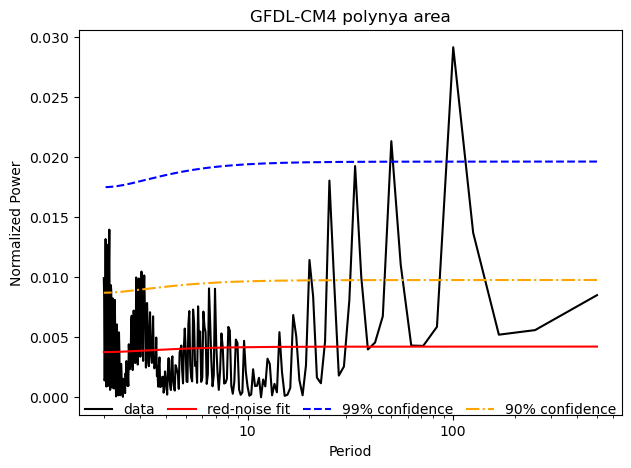

In [23]:
plot_spectrum(p_area_ann_G, "GFDL-CM4 polynya area")

In [24]:
periods, pave = cal_fft(p_area_ann_G)

In [31]:
rspec = red_noise_spectrum(len(periods), calculate_alpha(p_area_ann_G))

In [62]:
p = pave[10]

In [63]:
periods[10]

50.0

In [64]:
r = rspec[10]/np.sum(rspec)

In [65]:
r/p

0.19790443729574217

In [66]:
stats.f.cdf(p/r, dfn=2, dfd=500)

0.9932792607664697

In [61]:
pave[10]

0.021311602

In [71]:
calculate_max_ps(c_area_ann_E)

(13.157894736842106, 0.9971122010705545)

In [67]:
def calculate_max_ps(ds):
    alpha = calculate_alpha(ds)     #red noise lag-one autocorrelation
    periods, pave = cal_fft(ds)
    rspec = red_noise_spectrum(len(periods), alpha)

    pave

    max_ind = np.argmax(pave)
    max_period = periods[max_ind]
    r = rspec[max_ind]/np.sum(rspec)
    p = pave[max_ind]
    sig = stats.f.cdf(p/r, dfn=2, dfd=500)
    return max_period, sig

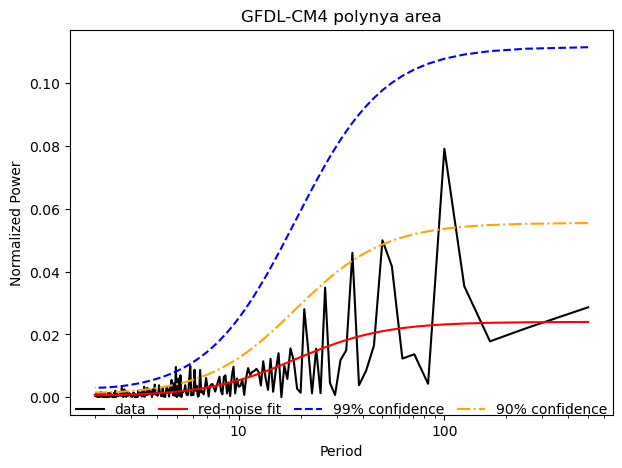

In [52]:
plot_spectrum(c_area_ann_G, "GFDL-CM4 polynya area")

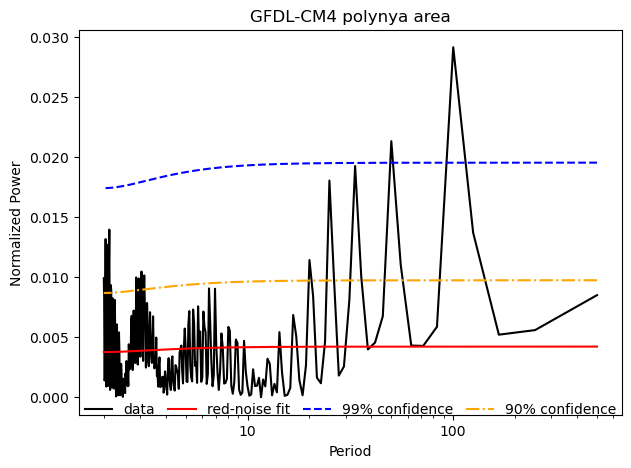

In [27]:
plot_spectrum(p_area_ann_G, "GFDL-CM4 polynya area")

# Build up spectra of EC-Earth3 Polynya Area 
### Based on Theory and Codes from Dr. Karen Smith's Climate and Geophysical Data Analysis text: https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/filtering_in_freq3.html#enso-cesm

## Compute (discrete) Red Noise Spectrum, developed by Gilman et al. 1963: https://doi.org/10.1175/1520-0469(1963)020%3C0182:OTPSON%3E2.0.CO;2
Unnormalized form of the discrete red noise spectrum: $$\phi(\omega) = \frac{1 - \alpha^2}{1 - 2\alpha \cos(\frac{h \pi}{N/2})+ \alpha^2},$$ where $h = 0, 1, 2, \dots, N/2$ and $\alpha$ is the lag-1 autocorrelation of the time series. 

In [11]:
## Define Global Variables/Parameters
# Length of Time Series
N = 500
N_2 = N/2
freq = np.arange(0, N_2+1)/N
alpha = 0.5


def cal_rspec(N_2, alpha=0.5):
    h = np.arange(0, N_2+1, 1)
    rspec = (1 - alpha**2) / (1 - 2 * alpha * np.cos(h * np.pi/N_2) + alpha**2)
    return rspec

In [12]:
def plot_spectrum(ds, N, alpha, plot_title):
    rspec = cal_rspec(N/2, alpha)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
    # i think freq here and freq above should be the same?
    freq, p = sig.welch(ds, window='hann', nperseg=N) # freq is array of sample frequencies, p is power spectrum/power spectral density of input
    # print(rspec)
    # Normalize spectrum
    p = p/np.sum(p)
    
    # Calculate significance using F-Test
    dof = 2 # how to determine this? what does realization of time series mean? for discrete power spectrum, M* = N/2 and DOf = N/M* = 2, N = # datapoints, M* = # independent spectral estimates? what does independent spectral estimate mean
    fstat = stats.f.ppf(0.99, dof, 1000)
    spec99 = [fstat*m for m in rspec] 
    
    fstat = stats.f.ppf(0.95, dof, 1000)
    spec95 = [fstat*m for m in rspec]
        
    # plot power spectrum and red noise spectra
    plt.figure(figsize=(7,5))
    plt.xlabel('Frequency (cycles per year)')
    # plt.ylabel('Power')
    plt.ylabel('Normalized Power')
    plt.title(plot_title + ' # Realizations = 1')
    #plt.ylim(0,0.12)
    #plt.xlim(0,0.5)
    plt.plot(freq, p, '-k', label = 'data')
    plt.plot(freq, rspec/np.sum(rspec), '-', label = 'red-noise fit', color = 'blue')
    plt.plot(freq, spec99/np.sum(rspec), '--', label = '99% confidence', color = 'red')
    plt.plot(freq, spec95/np.sum(rspec), '--', label = '95% confidence', color = 'orange')
    plt.legend(frameon = False)
    plt.tight_layout()

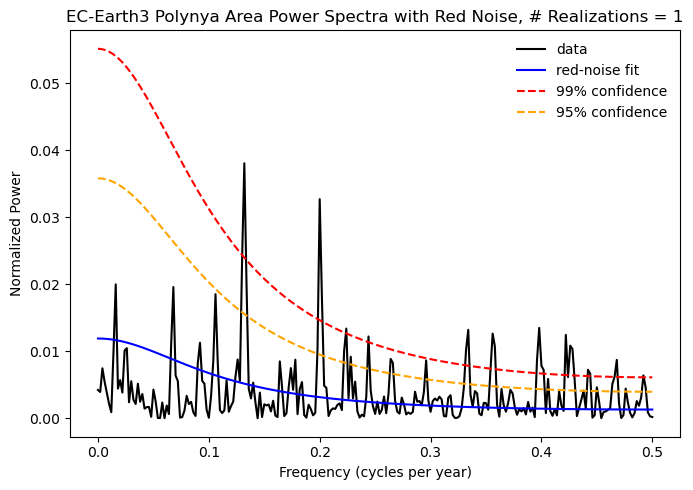

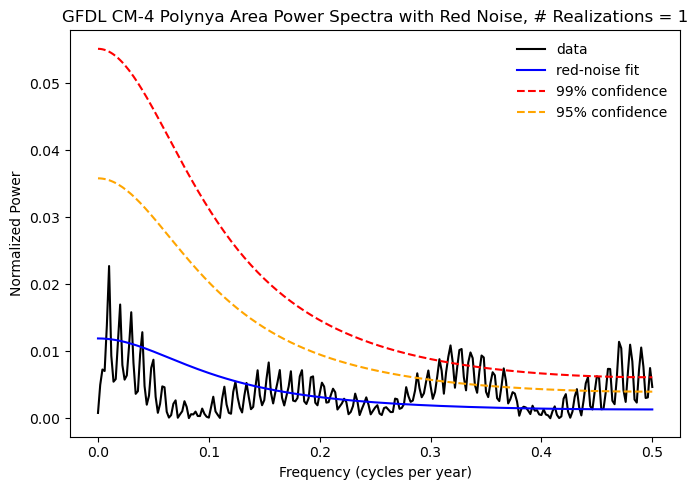

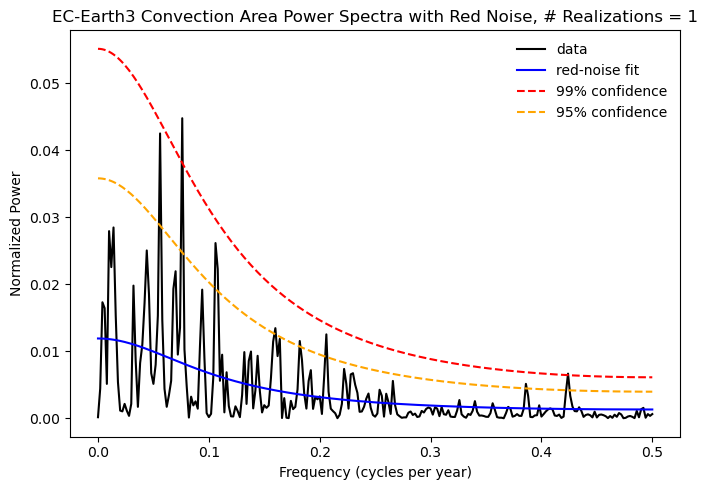

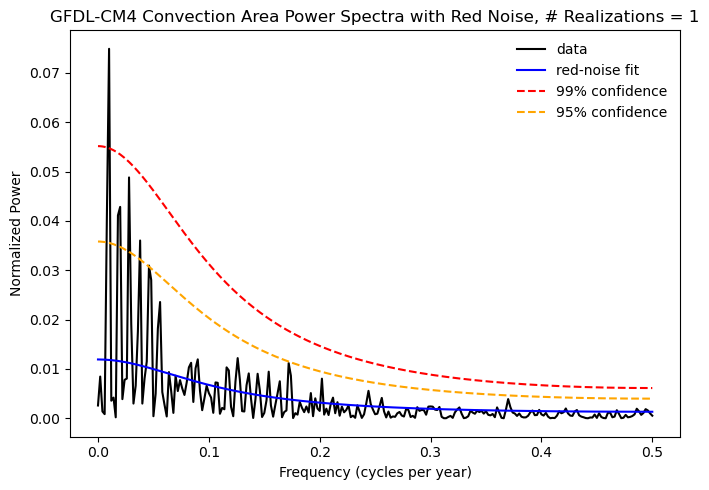

In [13]:
plot_spectrum(ec_e3_polynya_area, N, alpha, plot_title='EC-Earth3 Polynya Area Power Spectra with Red Noise,')
plot_spectrum(CM4_polynya_area, N, alpha, plot_title='GFDL CM-4 Polynya Area Power Spectra with Red Noise,')
plot_spectrum(ec_e3_convection_area, N, alpha, plot_title='EC-Earth3 Convection Area Power Spectra with Red Noise,')

 ## What is the area data? areacello - Grid-Cell Area for Ocean Variables. So then this is the area of the grid cells in the convection region/polynya region
plot_spectrum(CM4_convection_area, N, alpha, plot_title='GFDL-CM4 Convection Area Power Spectra with Red Noise,')